<a href="https://colab.research.google.com/github/rahiraja22/fish_image/blob/main/fishimage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!ls

Dataset.zip  sample_data


In [6]:
import zipfile

zip_path = "Dataset.zip"  # since it's in same folder after upload
extract_path = "/content/fish_data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted successfully!")


✅ Extracted successfully!


In [7]:
!ls /content/fish_data/

images.cv_jzk6llhf18tm3k0kyttxz


In [8]:
!ls /content/fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data/train

'animal fish'			 'fish sea_food red_sea_bream'
'animal fish bass'		 'fish sea_food sea_bass'
'fish sea_food black_sea_sprat'  'fish sea_food shrimp'
'fish sea_food gilt_head_bream'  'fish sea_food striped_red_mullet'
'fish sea_food hourse_mackerel'  'fish sea_food trout'
'fish sea_food red_mullet'


In [9]:
import os, shutil

# Full original dataset path
full_dataset_path = "/content/fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data/train"

# New folder for 2 class dataset
two_class_path = "/content/fish_data_2class/train"
shutil.rmtree(two_class_path, ignore_errors=True)  # Delete if already exists
os.makedirs(two_class_path)

# ✅ Replace this list with the 2 class names you want
class_to_copy = ['animal fish', 'fish sea_food shrimp']

# Loop through each class and copy it to the new folder
for class_name in class_to_copy:
    src = os.path.join(full_dataset_path, class_name)
    dst = os.path.join(two_class_path, class_name.replace(" ", "_"))
    shutil.copytree(src, dst)
    print(f"✅ Copied class: {class_name} ➡️ {dst}")

print("🎉 All 2 classes copied successfully!")



✅ Copied class: animal fish ➡️ /content/fish_data_2class/train/animal_fish
✅ Copied class: fish sea_food shrimp ➡️ /content/fish_data_2class/train/fish_sea_food_shrimp
🎉 All 2 classes copied successfully!


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
!ls "/content/fish_data_2class/train"

animal_fish  fish_sea_food_shrimp


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizing and splitting data
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
# Training data
train_generator = datagen.flow_from_directory(
    two_class_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)   subset='validation'

# Validation data
val_generator = datagen.flow_from_directory(
    two_class_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
 )


Found 1338 images belonging to 2 classes.
Found 334 images belonging to 2 classes.


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)
val_acc = history.history['val_accuracy'][-1]

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9038 - loss: 0.7060 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9963 - loss: 0.0159 - val_accuracy: 0.9970 - val_loss: 0.0189
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9941 - loss: 0.0238 - val_accuracy: 0.9970 - val_loss: 0.0155
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 1.0000 - loss: 3.1790e-04 - val_accuracy: 0.9970 - val_loss: 0.0288
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 1.0000 - loss: 1.5851e-05 - val_accuracy: 0.9970 - val_loss: 0.0318


In [ ]:
val_acc

1.0

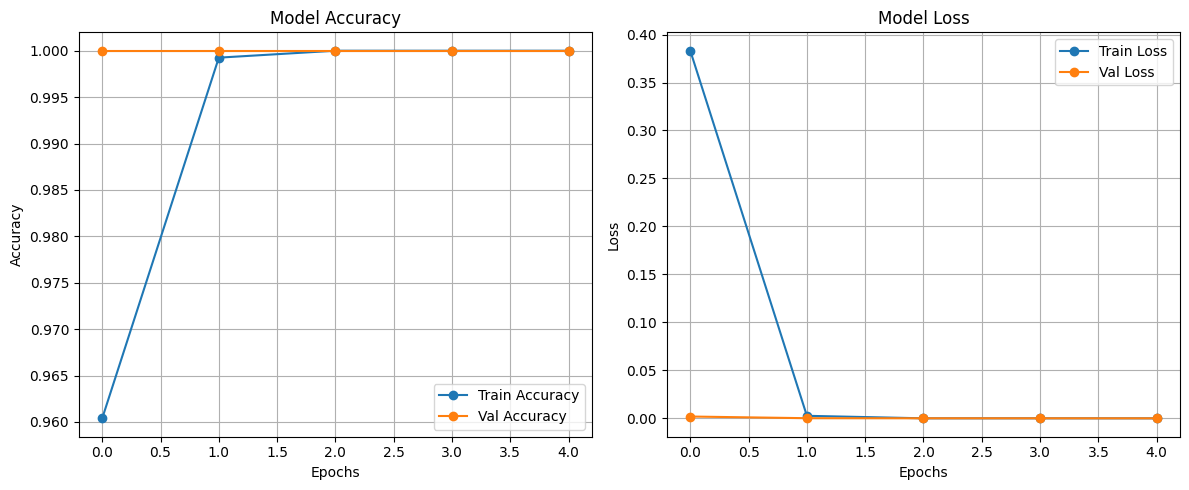

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras import layers, models

def build_model(base_model):
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())  # Flatten
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(2, activation='softmax'))
    return model


In [ ]:
from tensorflow.keras.applications import VGG16

# Load base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
model = build_model(base_model)

# Compile & Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Training VGG16...")
history_vgg = model.fit(train_generator, validation_data=val_generator, epochs=5)

# Save Accuracy
vgg_acc = history_vgg.history['val_accuracy'][-1]


Training VGG16...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 929s 11s/step - accuracy: 0.7673 - loss: 0.4768 - val_accuracy: 0.9701 - val_loss: 0.0863
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 898s 11s/step - accuracy: 0.9827 - loss: 0.0720 - val_accuracy: 0.9910 - val_loss: 0.0377
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 886s 11s/step - accuracy: 0.9932 - loss: 0.0370 - val_accuracy: 0.9880 - val_loss: 0.0267
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 932s 11s/step - accuracy: 0.9943 - loss: 0.0236 - val_accuracy: 0.9970 - val_loss: 0.0175
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 888s 11s/step - accuracy: 0.9979 - loss: 0.0189 - val_accuracy: 0.9970 - val_loss: 0.0148


In [ ]:
vgg_acc

0.9970059990882874

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = build_model(base_model)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Training ResNet50...")
history_resnet = model.fit(train_generator, validation_data=val_generator, epochs=5)

resnet_acc = history_resnet.history['val_accuracy'][-1]


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training ResNet50...
Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.6096 - loss: 0.7551 - val_accuracy: 0.6557 - val_loss: 0.5706
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.6754 - loss: 0.5724 - val_accuracy: 0.7455 - val_loss: 0.5101
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.7276 - loss: 0.4911 - val_accuracy: 0.7695 - val_loss: 0.4656
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.7566 - loss: 0.4534 - val_accuracy: 0.8174 - val_loss: 0.4369
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.7514 - loss: 0.4522 - val_accuracy: 0.8293 - val_loss: 0.4023


In [ ]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = build_model(base_model)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Training MobileNet...")
history_mobile = model.fit(train_generator, validation_data=val_generator, epochs=5)

mobile_acc = history_mobile.history['val_accuracy'][-1]


Training MobileNet...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 81s 910ms/step - accuracy: 0.9304 - loss: 0.1586 - val_accuracy: 1.0000 - val_loss: 8.0298e-04
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 79s 875ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 4.1146e-04
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 80s 952ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 5.0449e-05
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 73s 867ms/step - accuracy: 1.0000 - loss: 3.6771e-04 - val_accuracy: 1.0000 - val_loss: 1.2477e-04
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 74s 880ms/step - accuracy: 1.0000 - loss: 2.0672e-04 - val_accuracy: 1.0000 - val_loss: 2.0304e-05


In [ ]:
mobile_acc

1.0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = build_model(base_model)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Training EfficientNetB0...")
history_effnet = model.fit(train_generator, validation_data=val_generator, epochs=5)

effnet_acc = history_effnet.history['val_accuracy'][-1]


Training EfficientNetB0...
Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.6195 - loss: 0.6829 - val_accuracy: 0.6557 - val_loss: 0.6519
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.6632 - loss: 0.6550 - val_accuracy: 0.6557 - val_loss: 0.6454
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6651 - loss: 0.6463 - val_accuracy: 0.6557 - val_loss: 0.6459
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6508 - loss: 0.6655 - val_accuracy: 0.6557 - val_loss: 0.6435
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.6531 - loss: 0.6594 - val_accuracy: 0.6557 - val_loss: 0.6435


In [ ]:
effnet_acc

0.6556886434555054

In [ ]:
from tensorflow.keras.applications import InceptionV3




# ✅  Load base model with correct input shape
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# ✅  Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# ✅  Build complete model
model = build_model(base_model)

# ✅ Step 5: Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Step 7: Train model
print("Training InceptionV3...")
history_inception = model.fit(train_generator, validation_data=val_generator, epochs=5)

# ✅ Step 8: Save accuracy
inception_acc = history_inception.history['val_accuracy'][-1]
print(f"InceptionV3 Validation Accuracy: {inception_acc:.4f}")


Training InceptionV3...
Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.9175 - loss: 0.2031 - val_accuracy: 0.9970 - val_loss: 0.0109
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.9966 - loss: 0.0131 - val_accuracy: 0.9940 - val_loss: 0.0181
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.9973 - loss: 0.0065 - val_accuracy: 0.9940 - val_loss: 0.0404
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9970 - val_loss: 0.0094
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9940 - val_loss: 0.0209
InceptionV3 Validation Accuracy: 0.9940


In [1]:
accuracies = {
    'CNN': 1.00,
    'VGG16': 0.99,
    'ResNet50': 0.75,
    'MobileNet': 1.00,
    'InceptionV3': 0.99,
    'EfficientNetB0': 0.65
}


In [3]:
best_model_name = max(accuracies, key=accuracies.get)
print(f"✅ Best model is: {best_model_name} with accuracy {accuracies[best_model_name]:.2f}")


✅ Best model is: CNN with accuracy 1.00


In [14]:
model.save("best_fish_classifier.h5")
print("✅ Model saved as best_fish_classifier.h5")


✅ Model saved as best_fish_classifier.h5


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

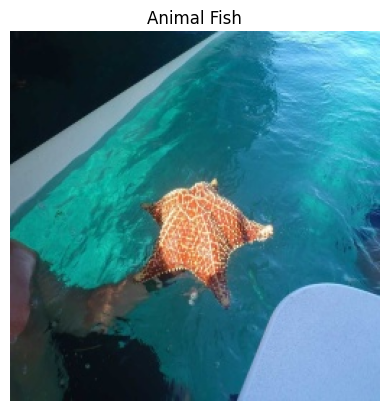

In [ ]:
img_path = img_path = "/content/fish_data_1class/train/animal_fish/KHNLR3DW0ET4.jpg"


img = mpimg.imread(img_path)   # Read image
plt.imshow(img)                # Show image
plt.axis('off')                # Remove x/y axis
plt.title("Animal Fish")       # Optional title
plt.show()

In [19]:
!pip install streamlit streamlit_option_menu

In [16]:
%%writefile fish_predict.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Load model
model = tf.keras.models.load_model("best_fish_classifier.h5")

# Class names (update these to your two class names)
class_names = ['animal fish', 'fish sea_food shrmip']

# Title
st.title("🐟 Fish Image Classifier")

# Upload image
uploaded_file = st.file_uploader("Upload an image of a fish", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display image
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    img = img.resize((224, 224))  # Match the input size used during training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    # Show prediction
    st.success(f"🔍 Predicted class: **{predicted_class}**")

Writing fish_predict.py


In [17]:
!wget -q -O - ipv4.icanhazip.com

34.75.0.27


In [ ]:
! streamlit run fish_predict.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.0.27:8501

⠼⠴your url is: https://full-cats-return.loca.lt
2025-06-26 10:59:54.187172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750935594.234901   14384 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750935594.249064   14384 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-26 11:00:00.038683: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-06-26 11:00:23.821 The `us